<a href="https://colab.research.google.com/github/Emanoeljunior/Control-System/blob/master/Diagramas_de_Bode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importando bibliotecas

In [ ]:
!pip install control

     |████████████████████████████████| 256kB 2.9MB/s 
  Created wheel for control: filename=control-0.8.3-py2.py3-none-any.whl size=260982 sha256=29bc01187b543443cfb1865f0e58a039fd8260cc563ecf0797de253d7179670a
  Stored in directory: /root/.cache/pip/wheels/c2/d9/cc/90b28cb139a6320a3af2285428b6da87eee8d8920c78bb0223
Successfully built control


In [ ]:
# Bibliotecas para uso de imagens
from IPython.display import Image
# Outras bibliotecas 
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import sympy as sym
from sympy.abc import s,t,x,y,z
from sympy.integrals import inverse_laplace_transform
from scipy.integrate import odeint
from sympy import *
import control
from IPython.display import display, Math, Latex

#Exercício 1

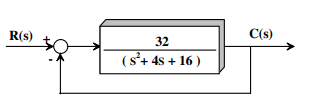

In [ ]:
Image("/content/drive/My Drive/Udesc/2020 1/ISC/LAB/imagens/Lab7/ex1.png", width=300)

## Análise teórica


Da teoria temos:

 ${e_{degrau}(\infty) = \dfrac{1}{1 + \lim_\limits{s\rightarrow 0} G(s) } \ \ \ \ K_p = \lim_\limits{s\rightarrow 0} G(s) }$   

  ${e_{rampa}(\infty) = \dfrac{1}{\lim_\limits{s\rightarrow 0} sG(s) } \ \ \ \ K_v = \lim_\limits{s\rightarrow 0} sG(s)}$

   ${e_{parábola}(\infty) = \dfrac{1}{ \lim_\limits{s\rightarrow 0} s^2G(s) } \ \ \ \ K_a = \lim_\limits{s\rightarrow 0} s^2G(s) }$


Para o primeiro sistema temos:

${G(s) = \dfrac{32}{s^2 + 4s + 16}}$

o que resulta em


 ${K_p = 2 \ \ \ \ e_{degrau}(\infty) = \dfrac{1}{3} }$

 O sistema é portanto do tipo 0.

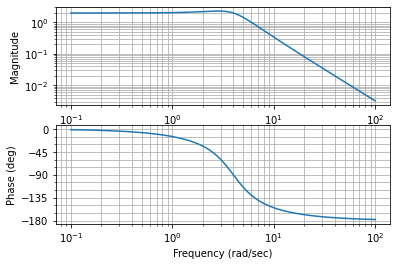

In [ ]:
w = np.logspace(-1,2,1000)
sys1 = control.tf(32, [1, 4, 16])
mag1, phase1, omega1 = control.bode_plot(sys1, w)


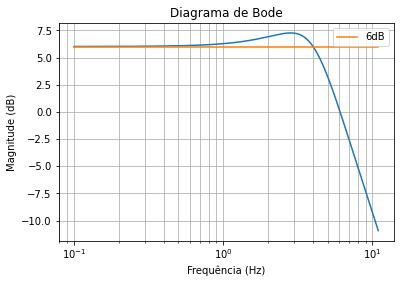

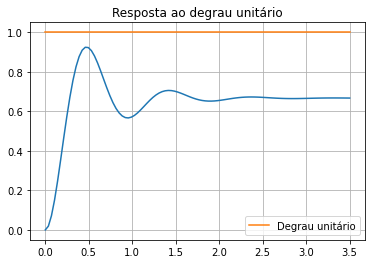

In [ ]:

plt.figure(2)
plt.subplot()
plt.plot(omega1[:680], 20*np.log10(mag1[:680]))
plt.plot(omega1[:680], 6*omega1[:680]/omega1[:680],label="6dB")
plt.xscale("log")
plt.title("Diagrama de Bode")
plt.xlabel("Frequência (rad/seg)")
plt.ylabel("Magnitude (dB)")
plt.grid(True, which="both", ls="-")
plt. legend(loc = 'best')
plt.show()

plt.figure(1)
plt.subplot()
sys1f = control.feedback(control.tf(32, [1, 4, 16]),sign= -1)
t, response = control.step_response(sys1f)
plt.grid(True, which="both", ls="-")
plt.plot(t,response)
plt.title("Resposta ao degrau unitário")
plt.plot(t,(t+1)/(t+1), label = "Degrau unitário")
plt. legend(loc = 'best')
plt.show()


Observando os gráficos podemos notar que os resultados ficaram como eperado.

No gráfico da resposta do degrau unitário podemos notar um erro de aproximadamente ${e_{degrau} \simeq \dfrac{1}{3}}$ como calculado analiticamente.

E pelo gráfico do diagrama de bode podemos verificar que a assíntota passa em $6 dB$ que corresponde a teoria $20 Log(K_p) \simeq 6 dB$.

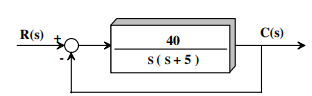

In [ ]:
Image("/content/drive/My Drive/Udesc/2020 1/ISC/LAB/imagens/Lab7/ex1-b.png", width=300)


  ${e_{rampa}(\infty) = \dfrac{1}{\lim_\limits{s\rightarrow 0} sG(s) } \ \ \ \ K_v = \lim_\limits{s\rightarrow 0} sG(s)}$

  $e_{rampa}(\infty) = \dfrac{1}{8} \ \ \ \ K_v = 8$ 

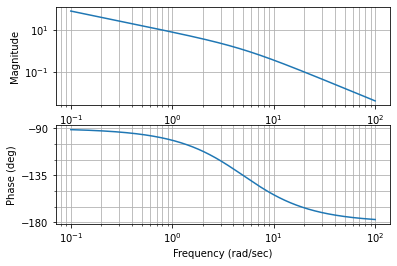

In [ ]:
w = np.logspace(-1,2,1000)
sys2 = control.tf(40, [1, 5, 0])
mag2, phase2, omega2 = control.bode(sys2, w)

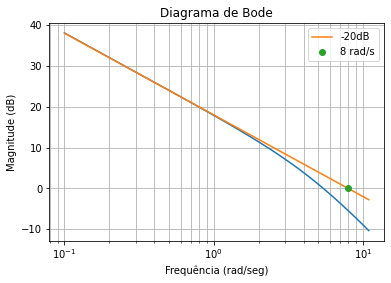

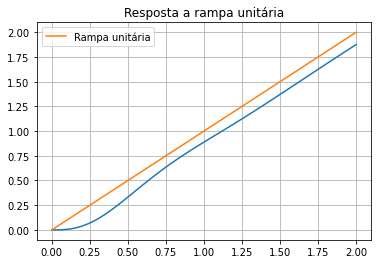

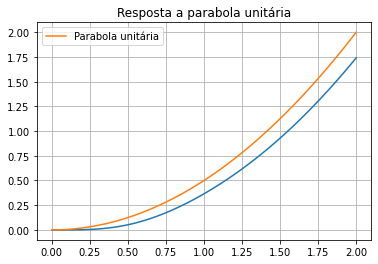

In [ ]:
plt.figure(1)
plt.subplot()
plt.plot(omega2[:680], 20*np.log10(mag2[:680]))
Y =  -20*np.log10(10*omega2[:680])+38
plt.plot(omega2[:680],Y,label="-20dB")

plt.xscale("log")
plt.title("Diagrama de Bode")
plt.xlabel("Frequência (rad/seg)")
plt.ylabel("Magnitude (dB)")
plt.plot(8,0, "o", label = "8 rad/s")
plt.grid(True, which="both", ls="-")
plt. legend(loc = 'best')
plt.show()

plt.figure(2)
plt.subplot()
sys2 = control.feedback(control.tf(40, [1, 5, 0]),sign= -1)
sys2f = control.series(sys2,control.tf([1],[1, 0, 0]))
t = np.linspace(0,2,100)
t,y = control.impulse_response(control.tf([1],[1,0,0]),t)
t, response = control.impulse_response(sys2f,t)
plt.grid(True, which="both", ls="-")
plt.plot(t,response)
plt.title("Resposta a rampa unitária")
plt.plot(t,y, label = "Rampa unitária")
plt. legend(loc = 'best')
plt.show()

plt.figure(3)
plt.subplot()
sys2 = control.feedback(control.tf(40, [1, 5, 0]),sign= -1)
sys2f = control.series(sys2,control.tf([1],[1, 0 ,0, 0]))
t = np.linspace(0,2,100)
t,y = control.impulse_response(control.tf([1],[1, 0,0,0]),t)
t, response = control.impulse_response(sys2f,t)
plt.grid(True, which="both", ls="-")
plt.plot(t,response)
plt.title("Resposta a parabola unitária")
plt.plot(t,y, label = "Parabola unitária")
plt. legend(loc = 'best')
plt.show()

Podemos notar que a resposta a rampa do sistema é constante, como esperado na teoria. Confirmando que se trata de um sistema do tipo 1.

Pelo gráfico também podemos notar que a frequência em que o ganho é zero é próximo de $K_v = 8 rad/s$ como esperado na parte analítica.


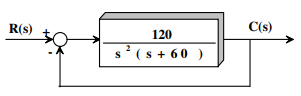

In [ ]:
Image("/content/drive/My Drive/Udesc/2020 1/ISC/LAB/imagens/Lab7/ex2-a.png", width=300)


  ${e_{parábola}(\infty) = \dfrac{1}{\lim_\limits{s\rightarrow 0} s^2G(s) } \ \ \ \ K_a = \lim_\limits{s\rightarrow 0} s^2G(s)}$

  $e_{parábola}(\infty) = \dfrac{1}{2} \ \ \ \ K_a= 2$

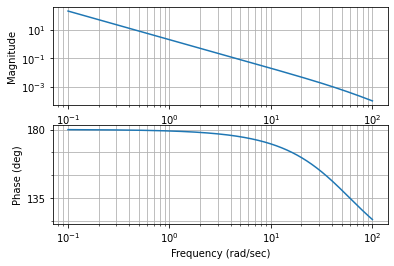

In [ ]:
w = np.logspace(-1,2,1000)
sys3 = control.tf([120], [1, 60, 0, 0])
mag3, phase3, omega3 = control.bode(sys3, w)


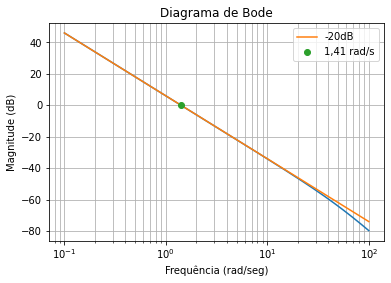

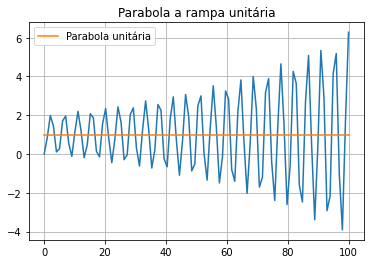

In [ ]:
plt.figure(2)
plt.subplot()
plt.plot(omega3, 20*np.log10(mag3))
Y =  -40*np.log10(10*omega3)+46
plt.plot(omega3,Y,label="-20dB")

plt.xscale("log")
plt.title("Diagrama de Bode")
plt.xlabel("Frequência (rad/seg)")
plt.ylabel("Magnitude (dB)")
plt.grid(True, which="both", ls="-")
plt.plot(1.41,0, "o", label = "1,41 rad/s")
plt. legend(loc = 'best')
plt.show()

plt.figure(1)
plt.subplot()
sys3 = control.feedback(control.tf(120, [1, 60, 0, 0]),sign= -1)
sys3f = control.series(sys3,control.tf([1],[1,0]))
t = np.linspace(0,100,100)
t,y = control.impulse_response(control.tf([1],[1,0]),t)
t, response = control.impulse_response(sys3f,t)
plt.grid(True, which="both", ls="-")
plt.plot(t,response)
plt.title("Degrau unitário")
plt.plot(t,y, label = "Degrau unitário")
plt. legend(loc = 'best')
plt.show()


Pelo gráfico podemos obter que $K_a = 2$, pois a frequência em que a magnitude é zero é aproximadamente $\sqrt{2}$.

Na resposta ao degrau podemos observar que o sistema apresenta um comportamento instável.

# Exercício 2

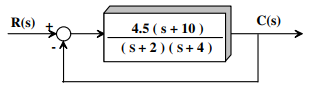

In [ ]:
Image("/content/drive/My Drive/Udesc/2020 1/ISC/LAB/imagens/Lab7/ex2-b.png", width=300)


 ${e_{degrau}(\infty) = \dfrac{1}{1 + \lim_\limits{s\rightarrow 0} G(s) } \ \ \ \ K_p = \lim_\limits{s\rightarrow 0} G(s) }$   


${G(s) = \dfrac{4,5 s + 45}{s^2 + 6s + 8}}$

Obtemos assim:

${K_p = \dfrac{45}{8} \ \ \ \ e_{degrau}(\infty) = \dfrac{8}{53} }$


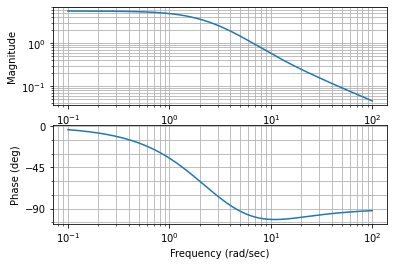

In [ ]:
w = np.logspace(-1,2,1000)
sys4 = control.tf([4.5, 45], [1, 6, 8])
mag4, phase4, omega4 = control.bode(sys4, w)

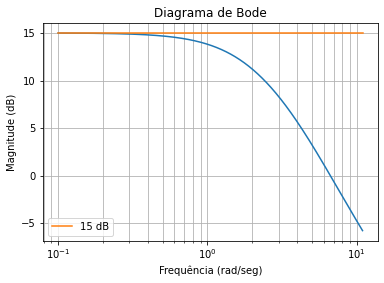

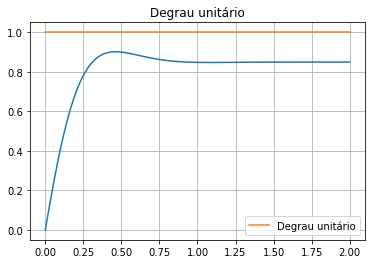

In [ ]:
plt.figure(2)
plt.subplot()
plt.plot(omega4[:680], 20*np.log10(mag4[:680]))
Y =  15*omega4[:680]/omega4[:680]
plt.plot(omega4[:680],Y,label="15 dB")

plt.xscale("log")
plt.title("Diagrama de Bode")
plt.xlabel("Frequência (rad/seg)")
plt.ylabel("Magnitude (dB)")
plt.grid(True, which="both", ls="-")
plt. legend(loc = 'best')
plt.show()

plt.figure(1)
plt.subplot()
sys4 = control.feedback(control.tf([4.5, 45], [1, 6, 8]),sign= -1)
sys4f = control.series(sys4,control.tf([1],[1,0]))
t = np.linspace(0,2,100)
t,y = control.impulse_response(control.tf([1],[1,0]),t)
t, response = control.impulse_response(sys4f,t)
plt.grid(True, which="both", ls="-")
plt.plot(t,response)
plt.title("Degrau unitário")
plt.plot(t,y, label = "Degrau unitário")
plt. legend(loc = 'best')
plt.show()

Do gráfico podemos obter ${K_p}$, sabendo que ${20 log(K_p) \simeq 15 dB}$, assim obtemos que ${K_p = 5.62}$ como esperado na parte analítica.